# **Laboratorio 8: Ready, Set, Deploy! 👩‍🚀👨‍🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolás Fuenzalida
- Nombre de alumno 2: Ignacio Huenchumil

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/onemoremoka/MDS7202labs)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [1]:
# Librerías
import os
import pickle
import json
import optuna
import mlflow
import mlflow.sklearn
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from optuna.visualization import plot_optimization_history, plot_param_importances
import matplotlib.pyplot as plt
import subprocess
from sklearn.model_selection import train_test_split

/home/marcosignacio/miniconda3/envs/mdslab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Función auxiliar
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_run_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_run_id + "/model")
    return best_model

In [4]:
import os
import subprocess
import pickle
import json
import pandas as pd
import mlflow
import mlflow.sklearn
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import xgboost as xgb
import matplotlib.pyplot as plt
from mlflow.models.signature import infer_signature

from optuna.visualization import plot_optimization_history, plot_param_importances

seed = 42
N = 50

def get_best_model(experiment_id):
    """Recupera el mejor modelo basado en el mejor valor de 'valid_f1'."""
    client = mlflow.tracking.MlflowClient()
    best_run = None
    best_f1 = -1
    for run in client.search_runs([experiment_id], order_by=["metrics.valid_f1 DESC"]):
        if run.data.metrics.get("valid_f1", -1) > best_f1:
            best_f1 = run.data.metrics.get("valid_f1", -1)
            best_run = run
    if best_run:
        model_uri = f"runs:/{best_run.info.run_id}/model"
        model = mlflow.sklearn.load_model(model_uri)
        return model
    else:
        raise ValueError("No runs found in the experiment.")

def optimize_model():
    # Cargar y preparar datos
    df = pd.read_csv('water_potability.csv')

    # Conjunto train y val
    X = df.drop('Potability', axis=1)
    y = df['Potability']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Configurar experimento
    experiment_name = "XGBoost_Water_Potability"
    mlflow.set_experiment(experiment_name)
    
    # Iniciar run principal
    with mlflow.start_run(run_name="Optuna_Optimization") as parent_run:
        # Registrar versiones de librerías
        requirements = subprocess.check_output(['pip', 'freeze']).decode('utf-8')
        mlflow.log_text(requirements, "requirements.txt")
        mlflow.log_param("seed", seed)
        
        # Función objetivo Optuna
        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'gamma': trial.suggest_float('gamma', 0, 10),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
                'objective': 'binary:logistic',
                'random_state': seed,
                'eval_metric': 'logloss',
                'n_jobs': -1
            }
            
            # Nombre descriptivo para el run
            run_name = f"XGBoost-lr{params['learning_rate']:.4f}-d{params['max_depth']}"
            with mlflow.start_run(run_name=run_name, nested=True):
                model = xgb.XGBClassifier(**params)
                model.fit(X_train, y_train)
                
                y_pred = model.predict(X_valid)
                f1 = f1_score(y_valid, y_pred)
                
                mlflow.log_params(params)
                mlflow.log_metric("valid_f1", f1)
                
                # Infiere signature y ejemplo
                signature = infer_signature(X_valid, y_pred)
                input_example = X_valid.iloc[:2]
                mlflow.sklearn.log_model(
                    model,
                    "model",
                    signature=signature,
                    input_example=input_example,
                )
                
            return f1

        # Optimización con Optuna
        study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
        study.optimize(objective, n_trials=N)
        
        # Guardar gráficos de Optuna
        os.makedirs("optuna_plots", exist_ok=True)
        plot_optimization_history(study).write_image("optuna_plots/optimization_history.png")
        plot_param_importances(study).write_image("optuna_plots/param_importances.png")
        mlflow.log_artifacts("optuna_plots", artifact_path="plots")
        
        # Obtener y guardar mejor modelo
        experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
        best_model = get_best_model(experiment_id)

        os.makedirs("models", exist_ok=True)
        with open("models/best_model.pkl", "wb") as f:
            pickle.dump(best_model, f)
        
        # Guardar configuración e importancia de características
        best_params = best_model.get_params()
        with open("best_params.json", "w") as f:
            json.dump(best_params, f)
        
        plt.figure(figsize=(10, 6))
        xgb.plot_importance(best_model)
        plt.title("Feature Importance")
        plt.savefig("feature_importance.png")
        plt.close()
        
        mlflow.log_artifact("best_params.json", artifact_path="plots")
        mlflow.log_artifact("feature_importance.png", artifact_path="plots")
        
        return best_model

if __name__ == "__main__":
    best_model = optimize_model()
    print("Optimización completada. Mejor modelo guardado en /models")


[I 2025-06-03 20:32:12,102] A new study created in memory with name: no-name-0d382a3e-1d1a-41e9-bddb-73c43caebd8f
[I 2025-06-03 20:32:14,230] Trial 0 finished with value: 0.37209302325581395 and parameters: {'n_estimators': 437, 'learning_rate': 0.22648248189516848, 'max_depth': 8, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 1.5599452033620265, 'min_child_weight': 1, 'reg_alpha': 8.661761457749352, 'reg_lambda': 6.011150117432088}. Best is trial 0 with value: 0.37209302325581395.
[I 2025-06-03 20:32:16,884] Trial 1 finished with value: 0.07086614173228346 and parameters: {'n_estimators': 737, 'learning_rate': 0.001124579825911934, 'max_depth': 10, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'gamma': 1.8182496720710062, 'min_child_weight': 2, 'reg_alpha': 3.0424224295953772, 'reg_lambda': 5.247564316322379}. Best is trial 0 with value: 0.37209302325581395.
[I 2025-06-03 20:32:18,834] Trial 2 finished with value: 0.078740

Optimización completada. Mejor modelo guardado en /models


<Figure size 1000x600 with 0 Axes>

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.

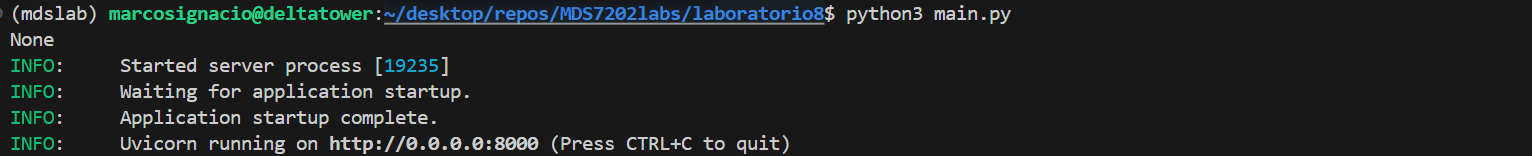

- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.

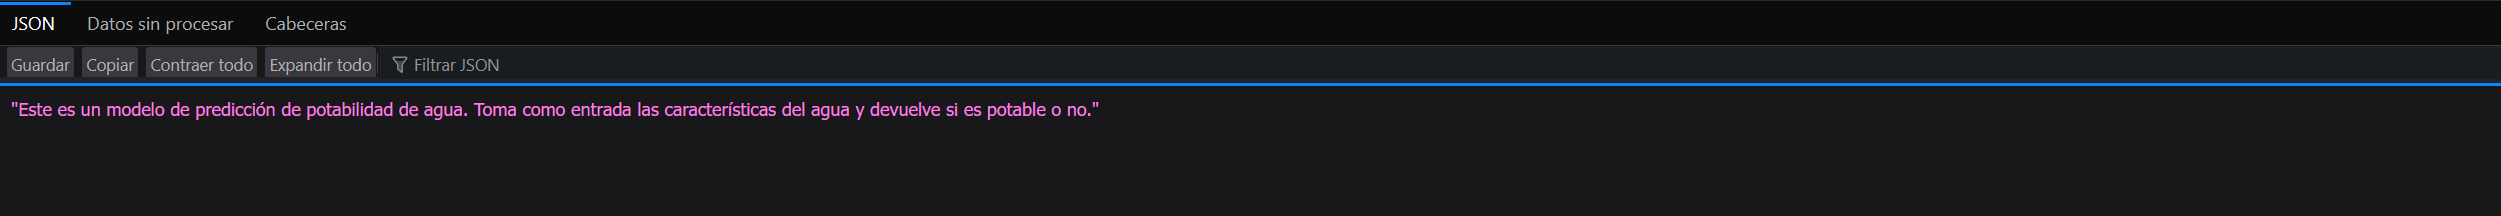


- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

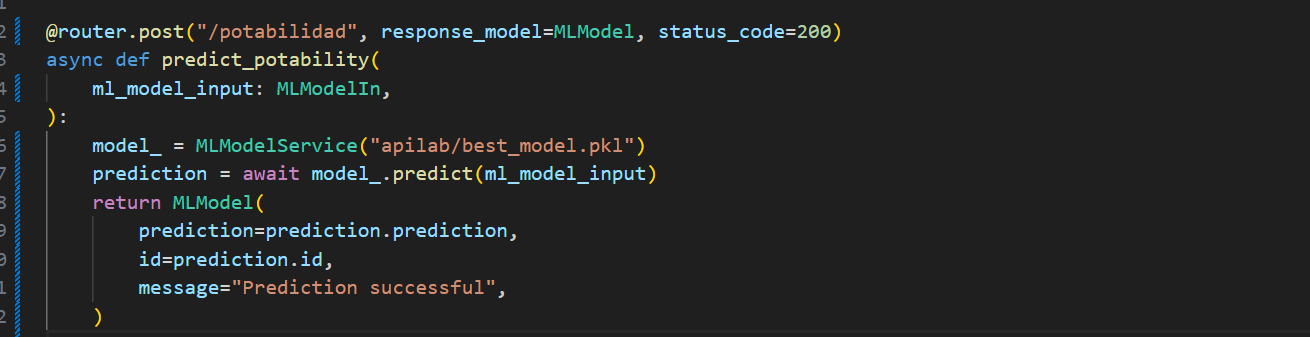



```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:

```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenens
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

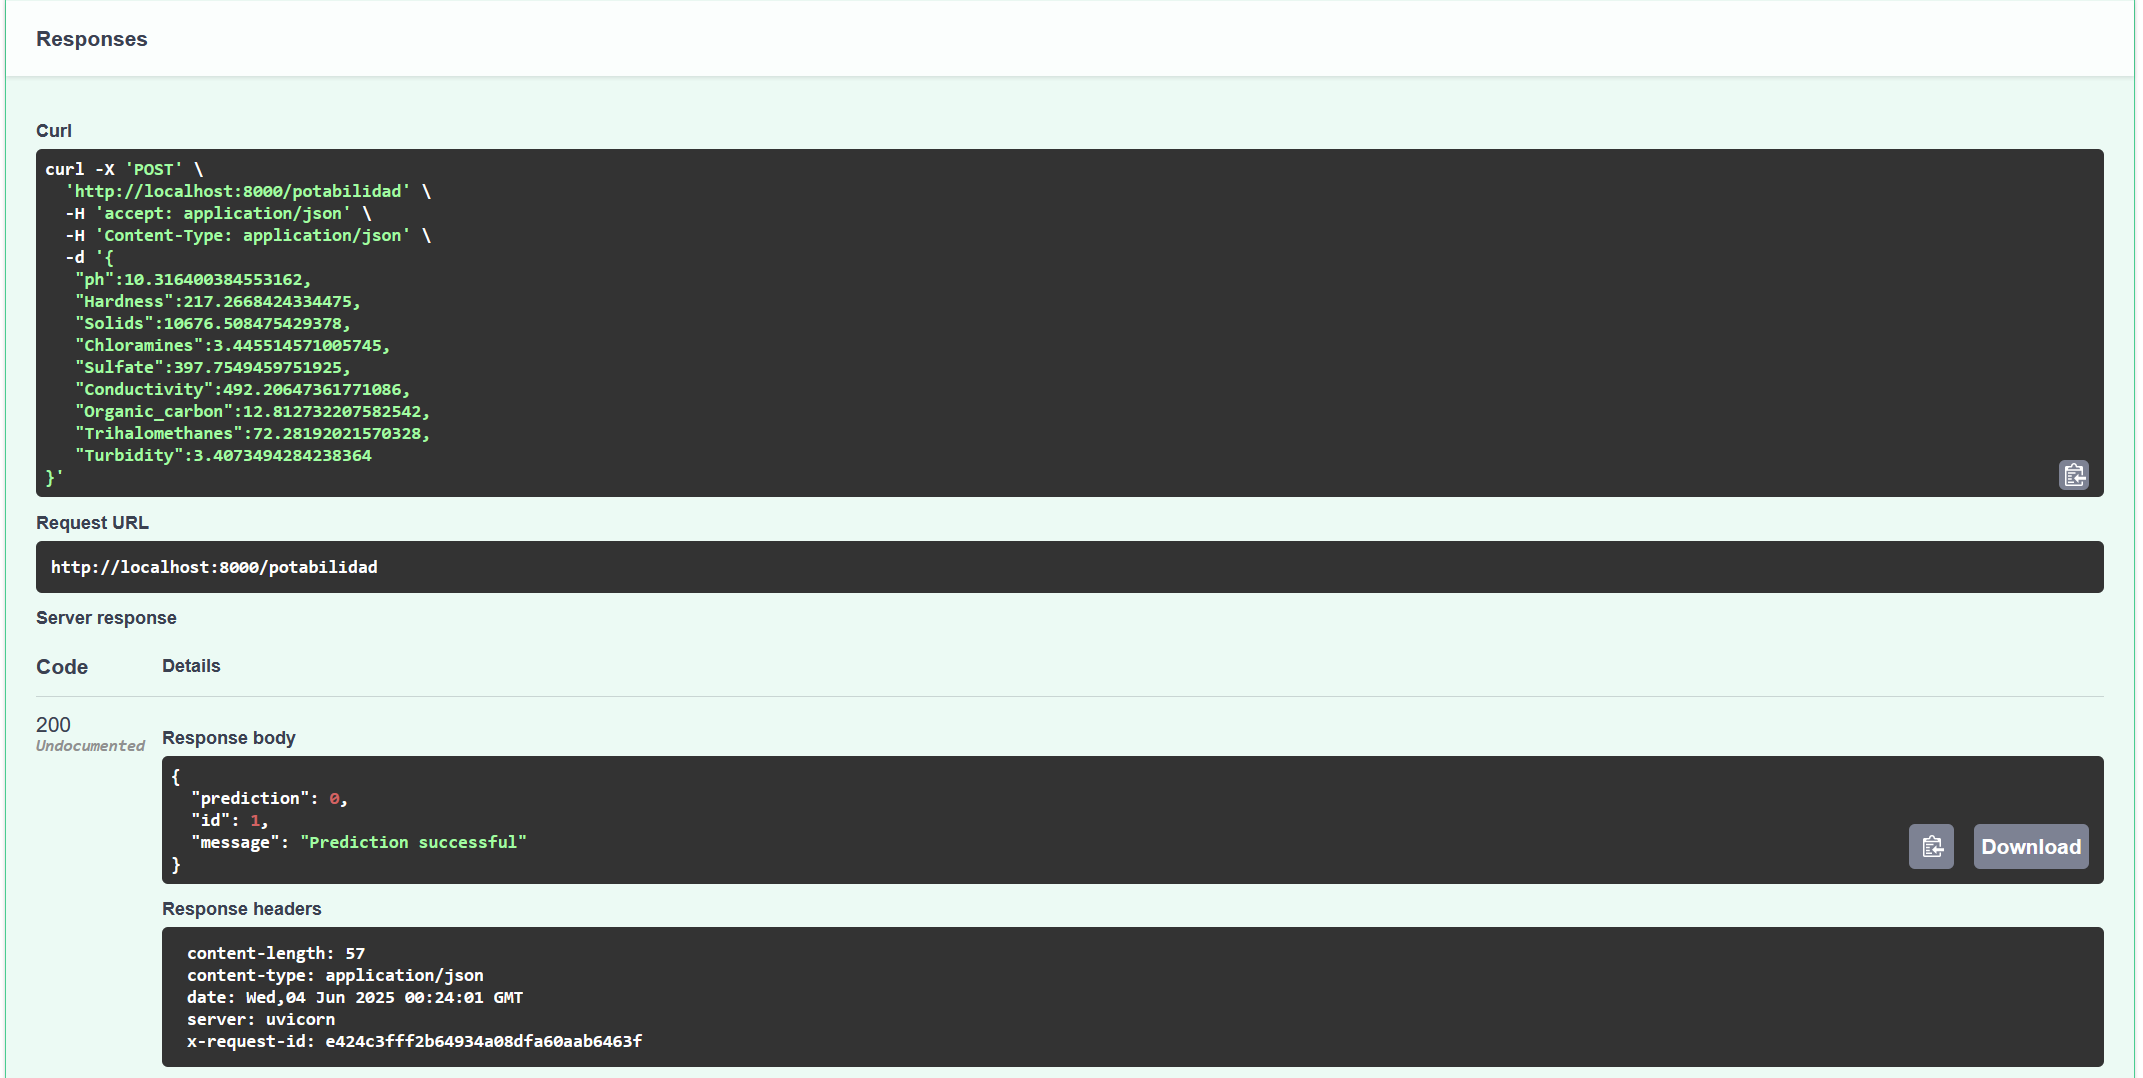

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:


1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

**Respuesta**:

1. **¿Cómo se diferencia Docker de una máquina virtual (VM)?**


2. **¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?**


3. **¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?**
   Docker aasegura la consistencia para entornos de desarrollo diferentes al encapsular las aplicaciones y sus dependencias, configuraciones y sistema opperativo dentro de una imagen inmutable defenida por un Dockerfile. Esto significa que la misma imagen puede ser ejecutada en cualquier entorno que soporte Docker, garantizando que la aplicación se tenga el mismo comportamiento independiente del sistema operativo host.

4. **¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?**

Los volumenes son una forma de crear datos persistentes en Docker, ya que almacenan información que se crean dentro del contenedor fuera del ciclo de vida del contenedor. Esto significa que los datos no se perderán cuando el contenedor se detenga o se elimine. Los volúmenes pueden ser montados en un directorio específico dentro del contenedor, permitiendo que la aplicación acceda a los datos de manera persistente.

5. **¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?**

Un Dockerfile es un manifiesto de intrucciones que define como construir una imagen docker. Detallando por lo general una imagen base del sistema operativo, las dependencias necesarias, que puerto exponer, los comandos a ejecutar y la configuración del entorno. La finalidad de un Dockerfile es crear una imagen que encapsule todo lo necesario para ejecutar una aplicación, la cual posteriormente genera los contendores que ejecutan nuestrra aplicación.

Por otro lado docker-compose es un orquestador de contenedores que permite tanto iniciales los contenedores como definir las relaciones entre ellos. Tal que a partir de un mismo comando `docker compose up -d` se puede levantar uun pool de servicios que interactúan entre sí. Esto es especialmente útil para aplicaciones que requieren múltiples servicios, como bases de datos, servidores web y otros componentes.

# Conclusión

Éxito!
<div align="center">
  <img src="https://i.pinimg.com/originals/55/f5/fd/55f5fdc9455989f8caf7fca7f93bd96a.gif" width="500">
</div>